In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression

In [58]:
df = pd.read_csv('data/loan.csv', sep='\t')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [60]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Обзор фич

In [61]:
df.Loan_ID.value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

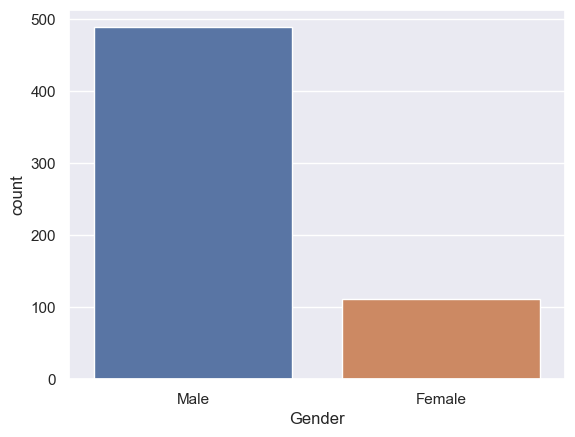

In [62]:
sns.countplot(x="Gender", data=df)
plt.show()

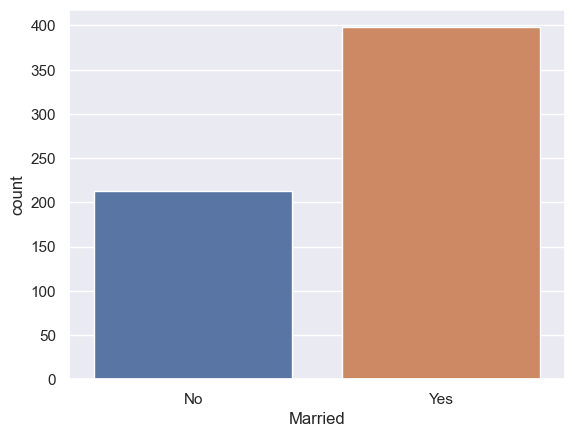

In [63]:
sns.countplot(x="Married", data=df)
plt.show()

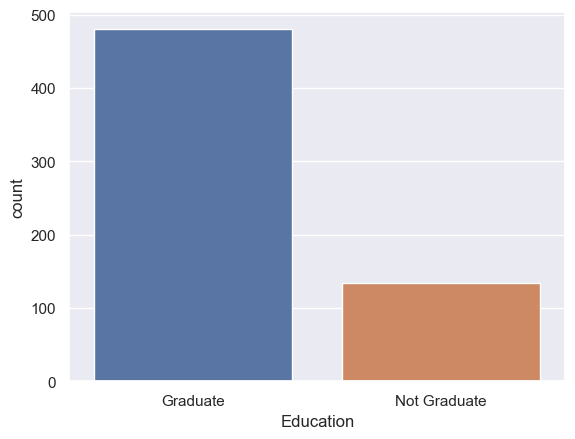

In [64]:
sns.countplot(x="Education", data=df)
plt.show()

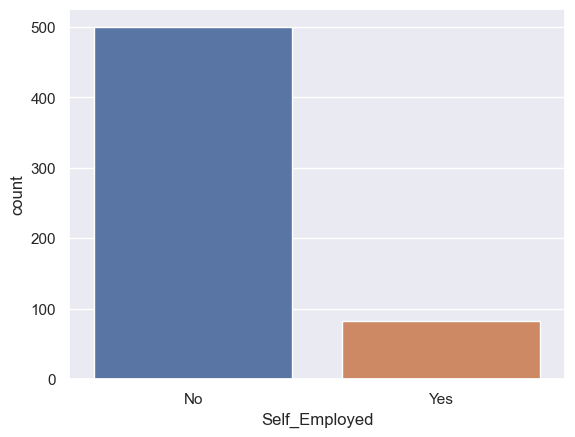

In [65]:
sns.countplot(x="Self_Employed", data=df)
plt.show()

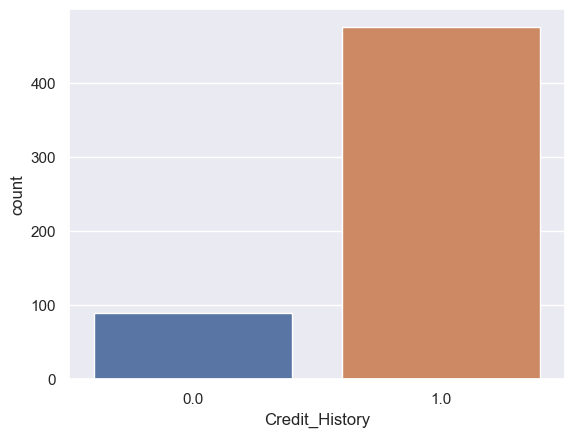

In [66]:
sns.countplot(x="Credit_History", data=df)
plt.show()

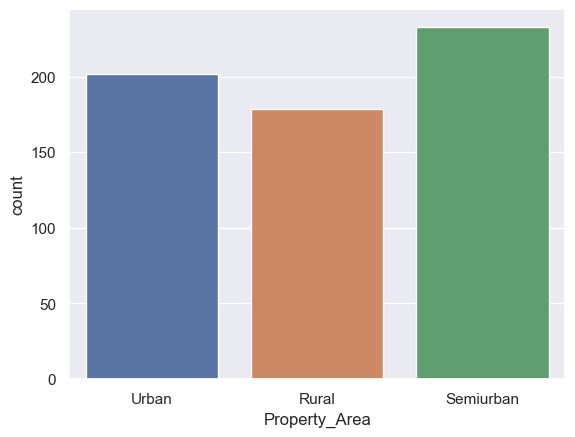

In [67]:
sns.countplot(x="Property_Area", data=df)
plt.show()

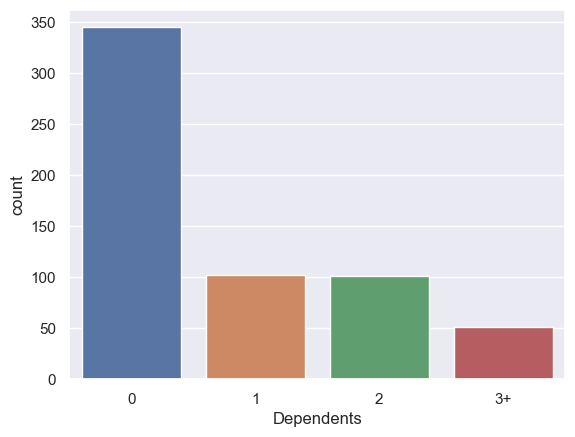

In [68]:
sns.countplot(x="Dependents", data=df)
plt.show()

### Целевая переменная

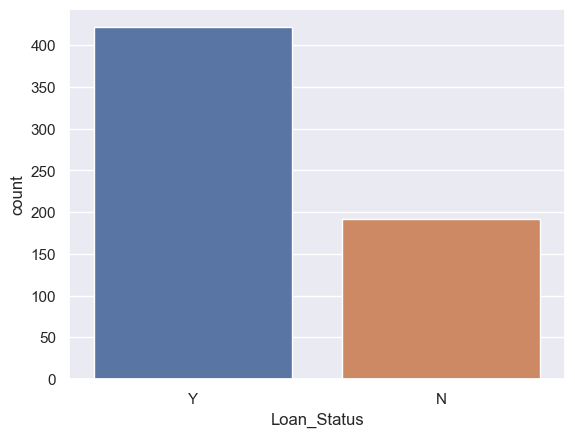

In [69]:
sns.countplot(x="Loan_Status", data=df)
plt.show()

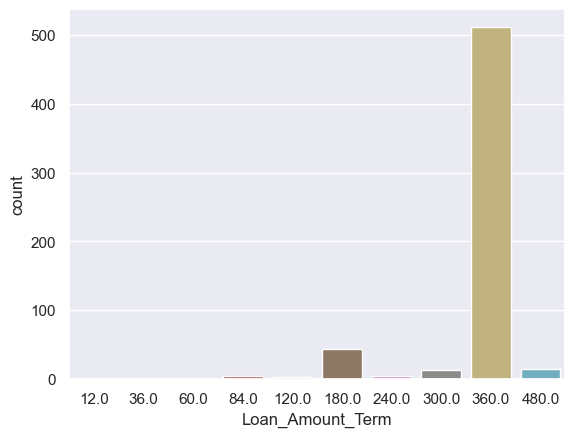

In [70]:
sns.countplot(x="Loan_Amount_Term", data=df)
plt.show()

In [71]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


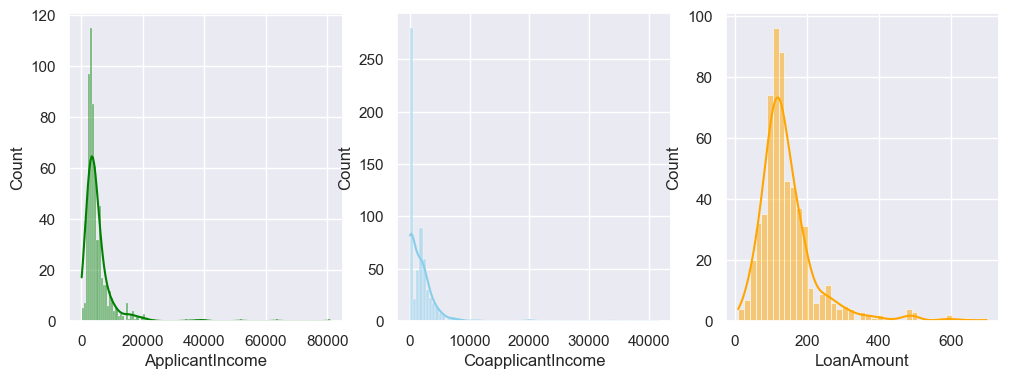

In [72]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[2], color='orange');

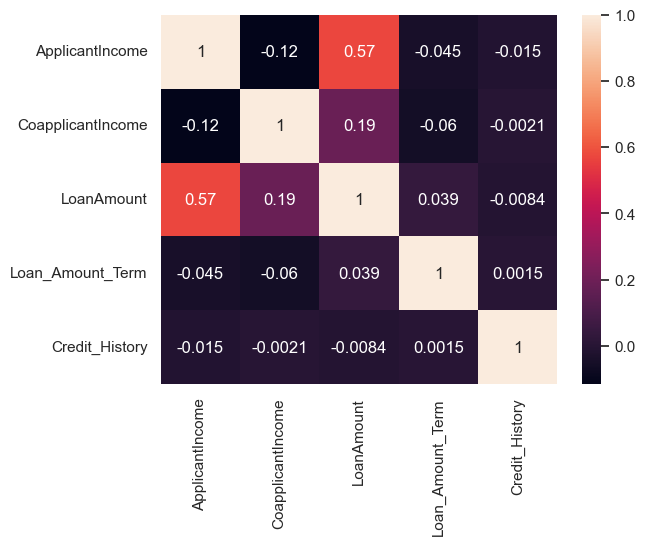

In [73]:
sns.heatmap(df.corr(), annot=True);

# Собираем датасет

In [74]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [75]:
df = df.drop(['Loan_ID'], axis = 1)

In [86]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

KeyError: 'Dependents'

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [ ]:
df = pd.get_dummies(df)
df

In [ ]:
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

new = {'Gender_Male': 'Gender', 
       'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 
       'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender                   614 non-null    uint8  
 6   Married                  614 non-null    uint8  
 7   Dependents_0             614 non-null    uint8  
 8   Dependents_1             614 non-null    uint8  
 9   Dependents_2             614 non-null    uint8  
 10  Dependents_3+            614 non-null    uint8  
 11  Education                614 non-null    uint8  
 12  Self_Employed            614 non-null    uint8  
 13  Property_Area_Rural      614 non-null    uint8  
 14  Property_Area_Semiurban  6

In [88]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [89]:
X, y = SMOTE().fit_resample(X, y)

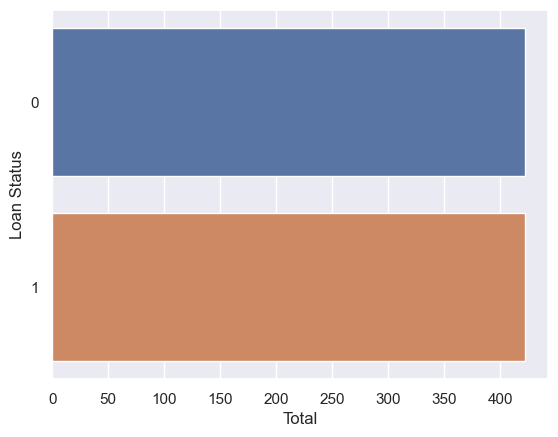

In [90]:
sns.countplot(y=y, data=X)
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

## Дорабатываем датасет

In [91]:
# Приводим к более нормальному распределению
X.ApplicantIncome = np.log(X.ApplicantIncome)
X.CoapplicantIncome = np.sqrt(X.CoapplicantIncome)
X.LoanAmount = np.log(X.LoanAmount)

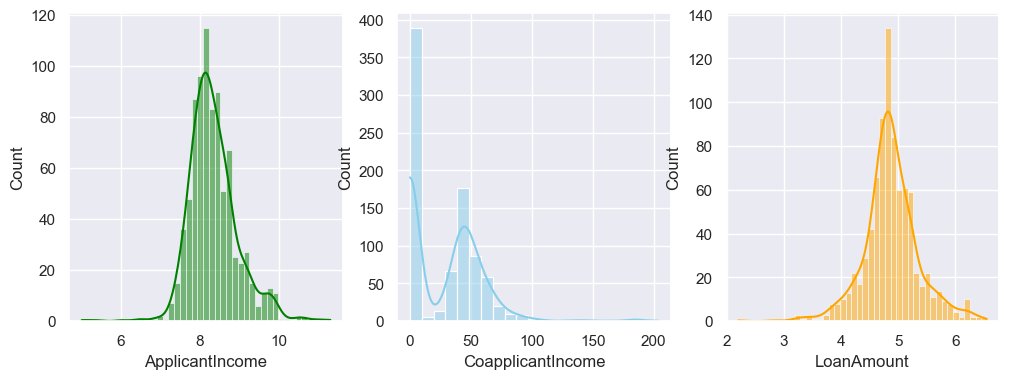

In [92]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(data=X, x="ApplicantIncome", kde=True, ax=axs[0], color='green')
sns.histplot(data=X, x="CoapplicantIncome", kde=True, ax=axs[1], color='skyblue')
sns.histplot(data=X, x="LoanAmount", kde=True, ax=axs[2], color='orange');

In [93]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# indexes = ((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)

# y = y[~indexes]
# X = X[~indexes]

# X = X[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# y = y[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [94]:
X = MinMaxScaler().fit_transform(X)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Логистическая регрессия

In [96]:
model = LogisticRegression(max_iter=500, random_state=0, verbose=1)
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=500, random_state=0, verbose=1)

In [97]:
y_pred = model.predict(X_test)

In [98]:
print(classification_report(y_test, y_pred))
print(mean_squared_error(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80        86
           1       0.75      0.99      0.85        83

    accuracy                           0.83       169
   macro avg       0.86      0.83      0.82       169
weighted avg       0.87      0.83      0.82       169

0.17159763313609466


<AxesSubplot:>

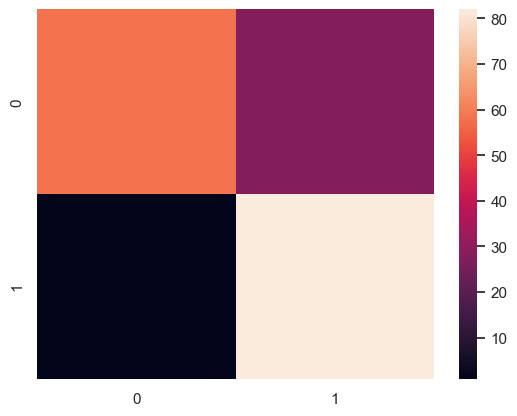

In [99]:
sns.heatmap(confusion_matrix(y_test, y_pred))

In [ ]:
micro average, micro accuracy
10 примеров
4 - 0   --- 3 правильно
6 - 1   --- 5 правильно
(3+5) / (4+6)

macro average, macro accuracy
10 примеров
4 - 0   --- 3 правильно
6 - 1   --- 5 правильно
(3/4 + 5/6)/2